In [482]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.datasets import load_digits

In [483]:
df =pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [484]:
X = df.drop('salary_more_then_100k',axis="columns")
X
Y = df['salary_more_then_100k']

In [485]:
from sklearn.preprocessing import LabelEncoder


In [486]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [487]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])
X.head(2)


,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1


In [488]:
X_n = X.drop(['company','degree','job'],axis = 'columns')
X_n.head(3)

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0


In [489]:
from sklearn import tree 
from sklearn.model_selection import train_test_split

In [490]:
model = tree.DecisionTreeClassifier()

In [491]:
X_train, X_test, Y_train, Y_test= train_test_split(X_n,Y,test_size=0.2)

In [492]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [493]:
model.predict(X_test)

array([0, 0, 1, 1], dtype=int64)

In [494]:
model.predict([[2,2,1]])

c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [495]:
model.score(X_test,Y_test)

0.75

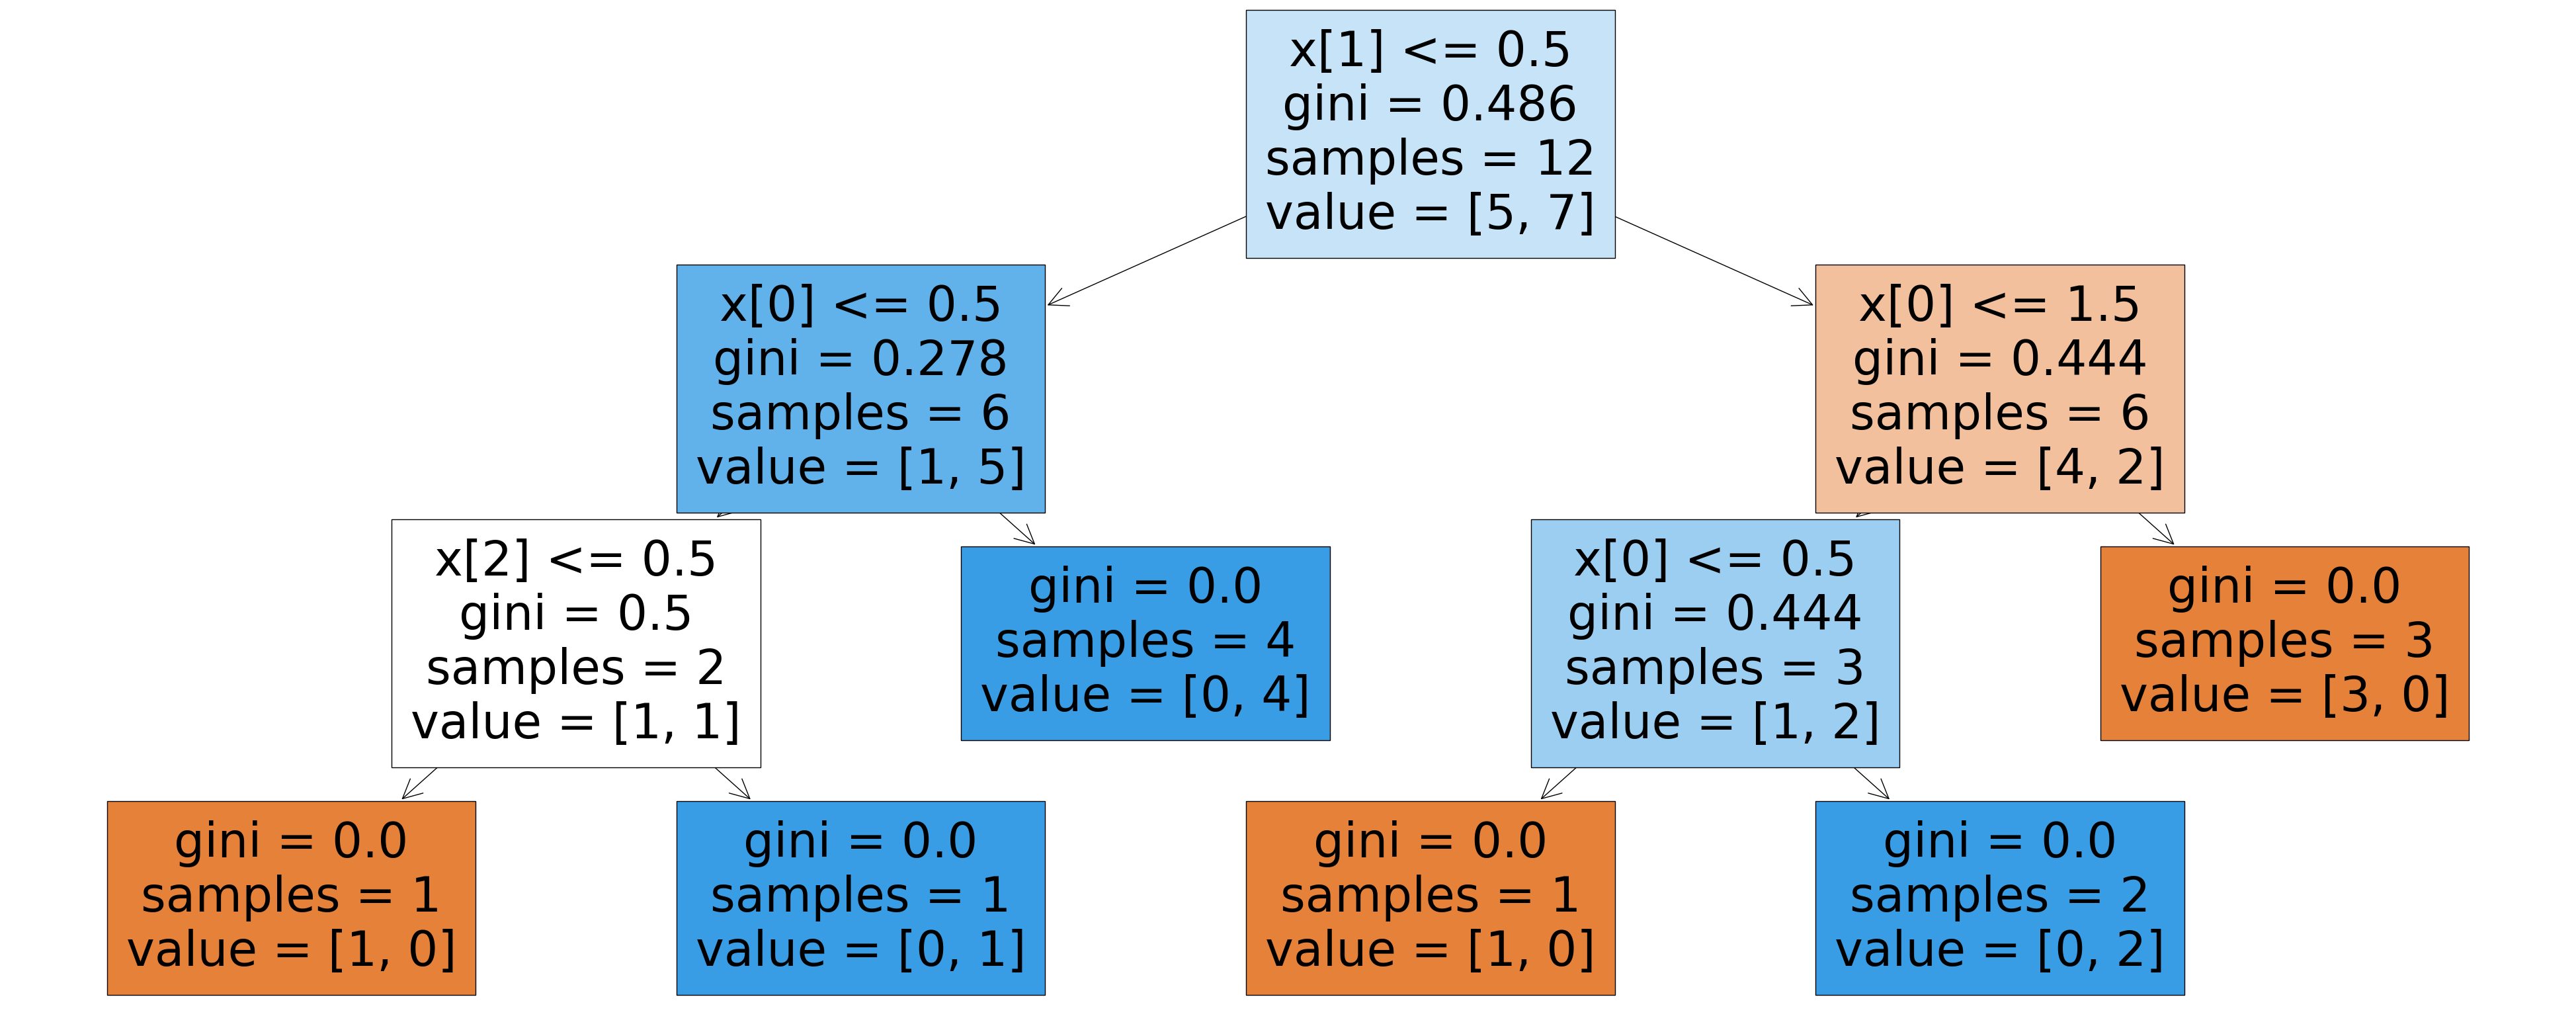

In [496]:

plt.figure(figsize = (50,20))
tree.plot_tree(model, filled=True)
plt.show()